## Data Collection and Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch data with an extended date range
from fredapi import Fred
fred = Fred(api_key='6b6f56be8ed7dafee7f6f255d71b8f8c')

# Fetch data from FRED API
unemployment_rate = fred.get_series('UNRATE', observation_start='2000-01-01')
initial_jobless_claims = fred.get_series('ICSA', observation_start='2000-01-01')
consumer_sentiment_index = fred.get_series('UMCSENT', observation_start='2000-01-01')
housing_starts = fred.get_series('HOUST', observation_start='2000-01-01')
sp500_index = fred.get_series('SP500', observation_start='2000-01-01')
ten_year_treasury_yield = fred.get_series('GS10', observation_start='2000-01-01')

# Combine all data into a single DataFrame
combined_data = pd.DataFrame({
    'Unemployment Rate': unemployment_rate,
    'Initial Jobless Claims': initial_jobless_claims,
    'Consumer Sentiment Index': consumer_sentiment_index,
    'Housing Starts': housing_starts,
    'S&P 500 Index': sp500_index,
    '10-Year Treasury Yield': ten_year_treasury_yield
})

# Resample data to monthly, using the last observation for each month
combined_data = combined_data.resample('M').last()

# Load the Daily Treasury Par Yield Curve Rates data
yield_curve_data = pd.read_csv(r'C:\Users\salin\OneDrive\Desktop\DSC680 Applied Data Science\weeks9-12\yield-curve-rates-1990-2023.csv')
yield_curve_data['Date'] = pd.to_datetime(yield_curve_data['Date'])
yield_curve_data.set_index('Date', inplace=True)

# Load the Daily Treasury Long-Term Rates data
long_term_rates_data = pd.read_csv(r'C:\Users\salin\OneDrive\Desktop\DSC680 Applied Data Science\weeks9-12\long-term-rates-2000-2023.csv')
long_term_rates_data['Date'] = pd.to_datetime(long_term_rates_data['Date'])
long_term_rates_data.set_index('Date', inplace=True)

# Merge yield_curve_data with combined_data
combined_data = pd.merge(combined_data, yield_curve_data, left_index=True, right_index=True, how='left')

# Merge long_term_rates_data with the already merged data
combined_data = pd.merge(combined_data, long_term_rates_data, left_index=True, right_index=True, how='left')

# Advanced imputation for missing values in S&P 500 Index
combined_data['S&P 500 Index'] = combined_data['S&P 500 Index'].interpolate(method='time').fillna(method='bfill')

# Verify missing values after advanced interpolation
missing_values = combined_data.isnull().sum()
print(missing_values)

# Handle any potential NaN values (forward fill as an example)
combined_data.fillna(method='ffill', inplace=True)

# Inspect the data
print(combined_data.info())
print(combined_data.describe())

# Check for missing values
missing_values = combined_data.isnull().sum()
print(missing_values)



Unemployment Rate             1
Initial Jobless Claims        0
Consumer Sentiment Index      1
Housing Starts                1
S&P 500 Index                 0
10-Year Treasury Yield        1
1 Mo                        102
2 Mo                        248
3 Mo                         89
4 Mo                        282
6 Mo                         89
1 Yr                         89
2 Yr                         89
3 Yr                         89
5 Yr                         89
7 Yr                         89
10 Yr                        89
20 Yr                        89
30 Yr                       122
LT COMPOSITE (>10 Yrs)       89
TREASURY 20-Yr CMT           89
Extrapolation Factor        260
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 293 entries, 2000-01-31 to 2024-05-31
Freq: M
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unemployment Rate         293 non-nu

## Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 293 entries, 2000-01-31 to 2024-05-31
Freq: M
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unemployment Rate         293 non-null    float64
 1   Initial Jobless Claims    293 non-null    float64
 2   Consumer Sentiment Index  293 non-null    float64
 3   Housing Starts            293 non-null    float64
 4   S&P 500 Index             293 non-null    float64
 5   10-Year Treasury Yield    293 non-null    float64
 6   1 Mo                      275 non-null    float64
 7   2 Mo                      68 non-null     float64
 8   3 Mo                      293 non-null    float64
 9   4 Mo                      20 non-null     float64
 10  6 Mo                      293 non-null    float64
 11  1 Yr                      293 non-null    float64
 12  2 Yr                      293 non-null    float64
 13  3 Yr                      293 non-null

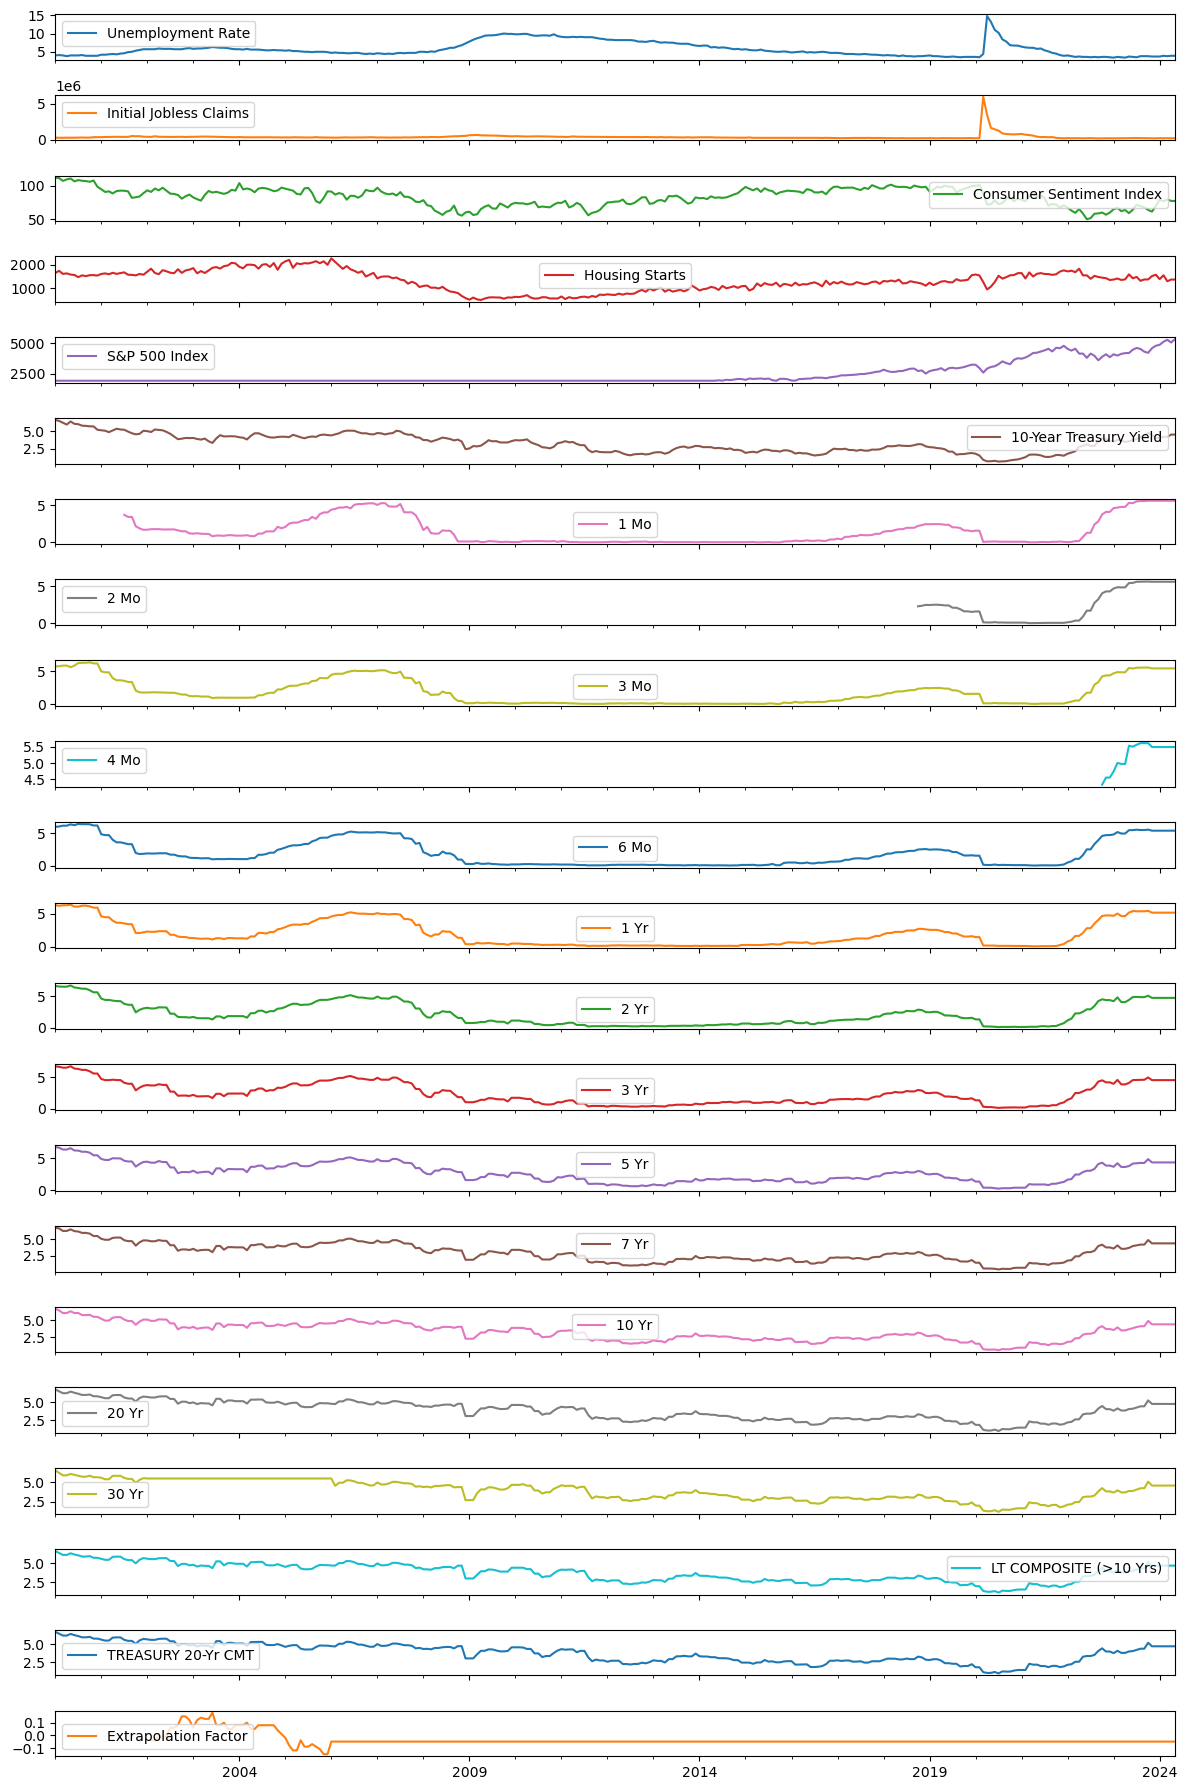

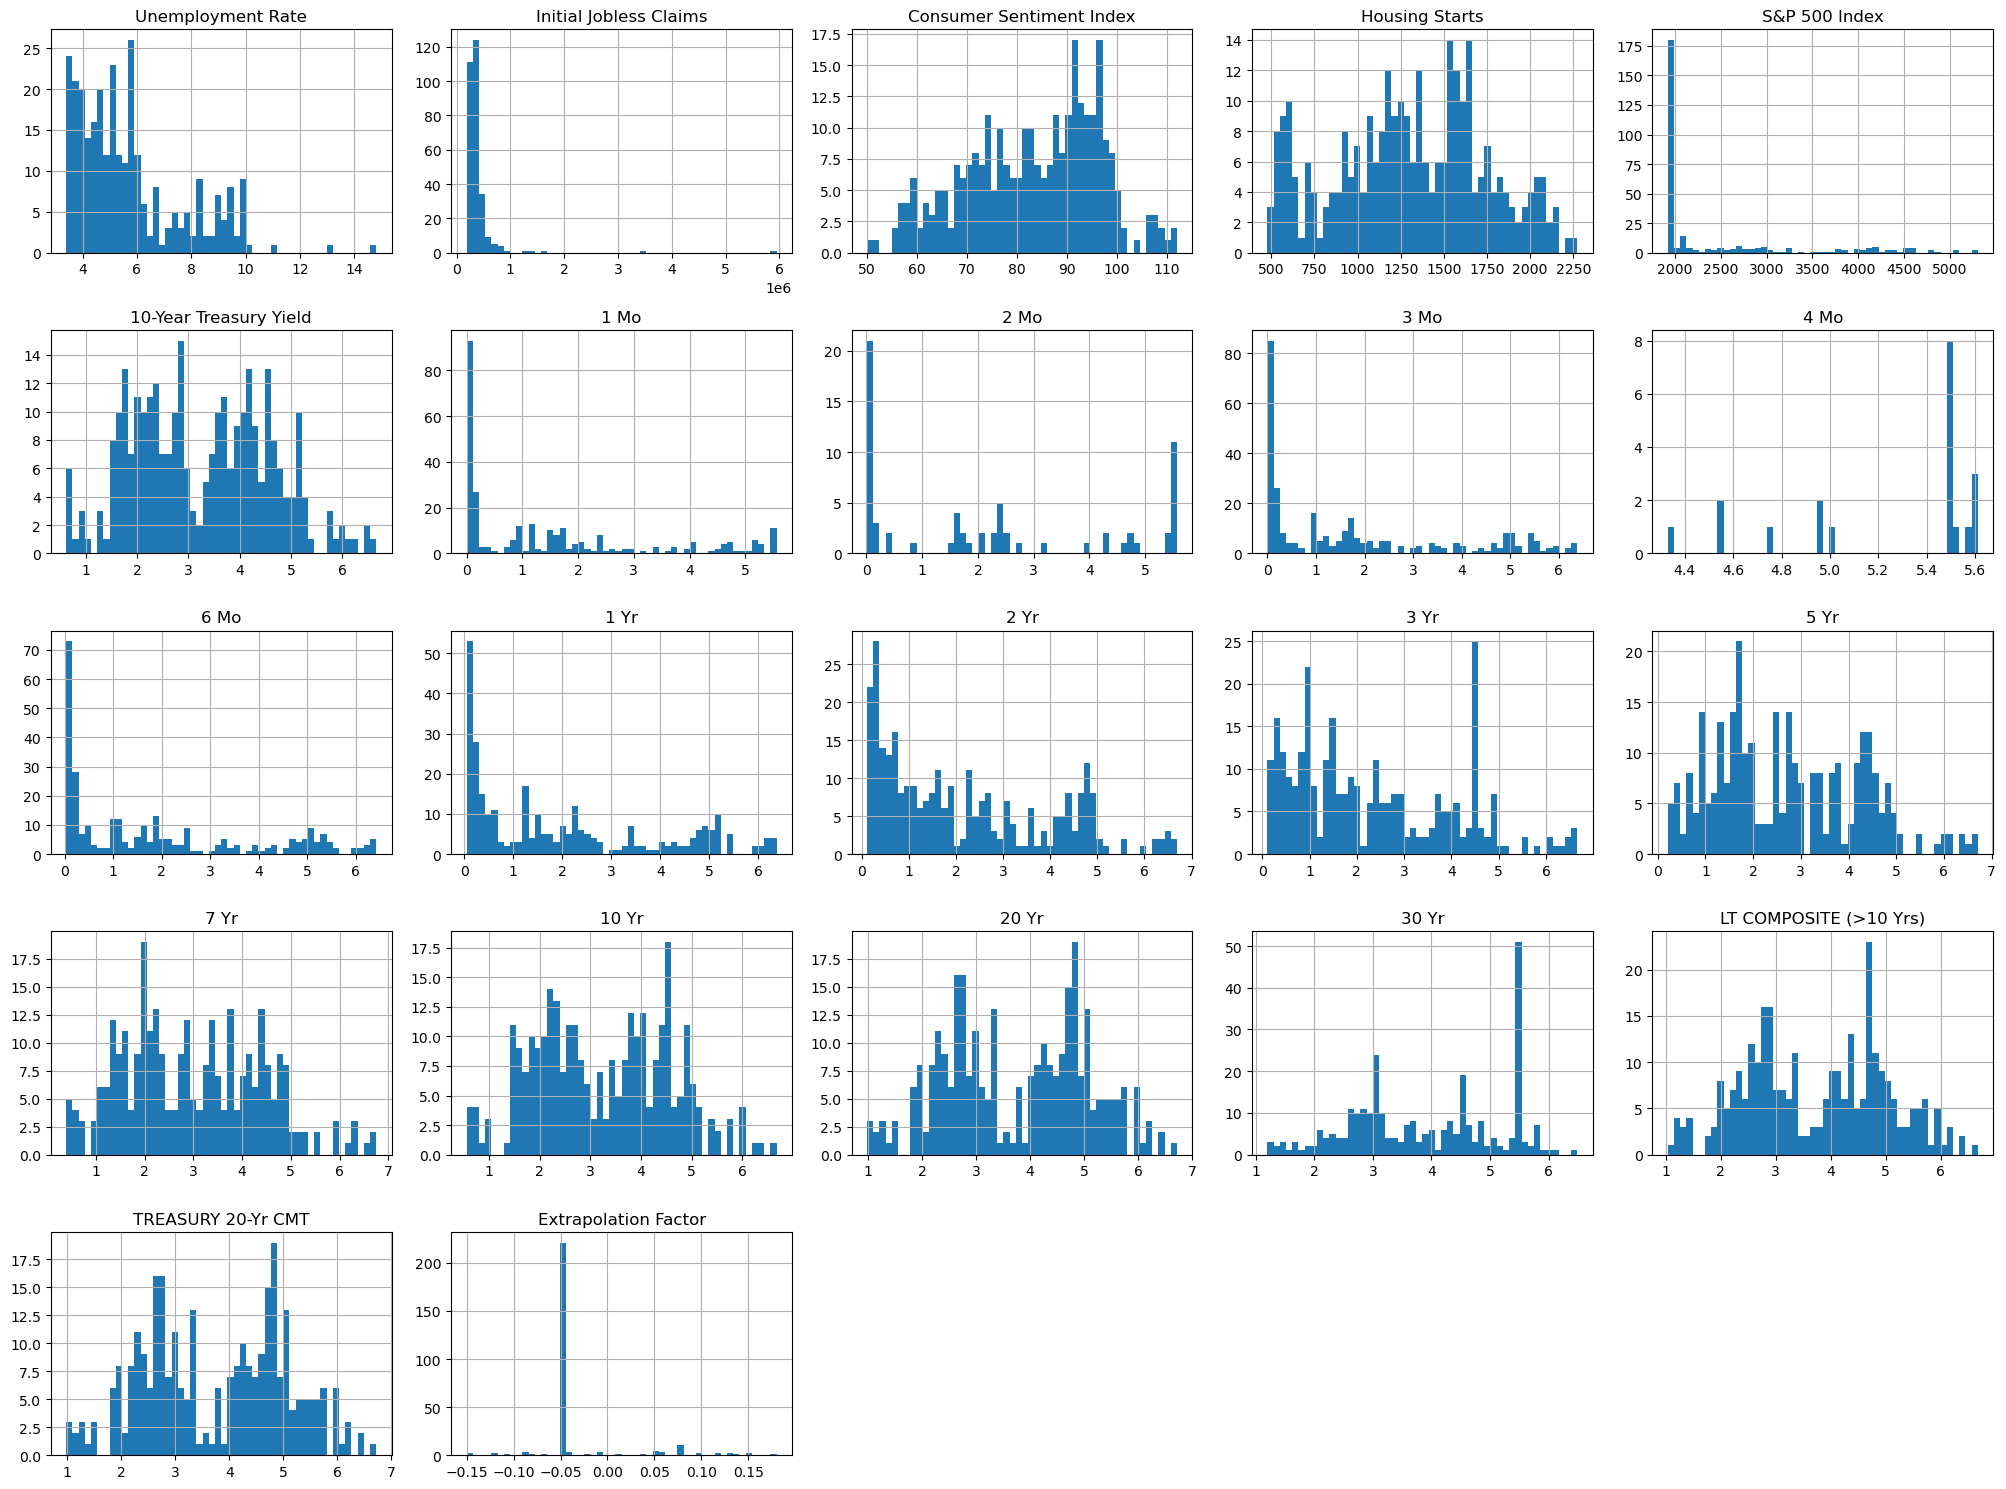

Correlation Matrix with Unemployment Rate:
Unemployment Rate           1.000000
Initial Jobless Claims      0.350648
Consumer Sentiment Index   -0.407165
Housing Starts             -0.597250
S&P 500 Index              -0.356714
10-Year Treasury Yield     -0.299425
1 Mo                       -0.564185
2 Mo                       -0.486816
3 Mo                       -0.596492
4 Mo                        0.637163
6 Mo                       -0.607067
1 Yr                       -0.614367
2 Yr                       -0.599557
3 Yr                       -0.574485
5 Yr                       -0.490350
7 Yr                       -0.405321
10 Yr                      -0.304152
20 Yr                      -0.178577
30 Yr                      -0.129028
LT COMPOSITE (>10 Yrs)     -0.207523
TREASURY 20-Yr CMT         -0.178577
Extrapolation Factor        0.009905
Name: Unemployment Rate, dtype: float64


In [2]:
# Inspect the data
print(combined_data.info())
print(combined_data.describe())

# Check for missing values
missing_values = combined_data.isnull().sum()
print(missing_values)

# Summary statistics
print(combined_data.describe())

# Time series plots
combined_data.plot(subplots=True, figsize=(12, 18))
plt.tight_layout()
plt.show()

# Histograms
combined_data.hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()

# Calculate correlations with the Unemployment Rate
correlation_matrix = combined_data.corr()
print("Correlation Matrix with Unemployment Rate:")
print(correlation_matrix['Unemployment Rate'])


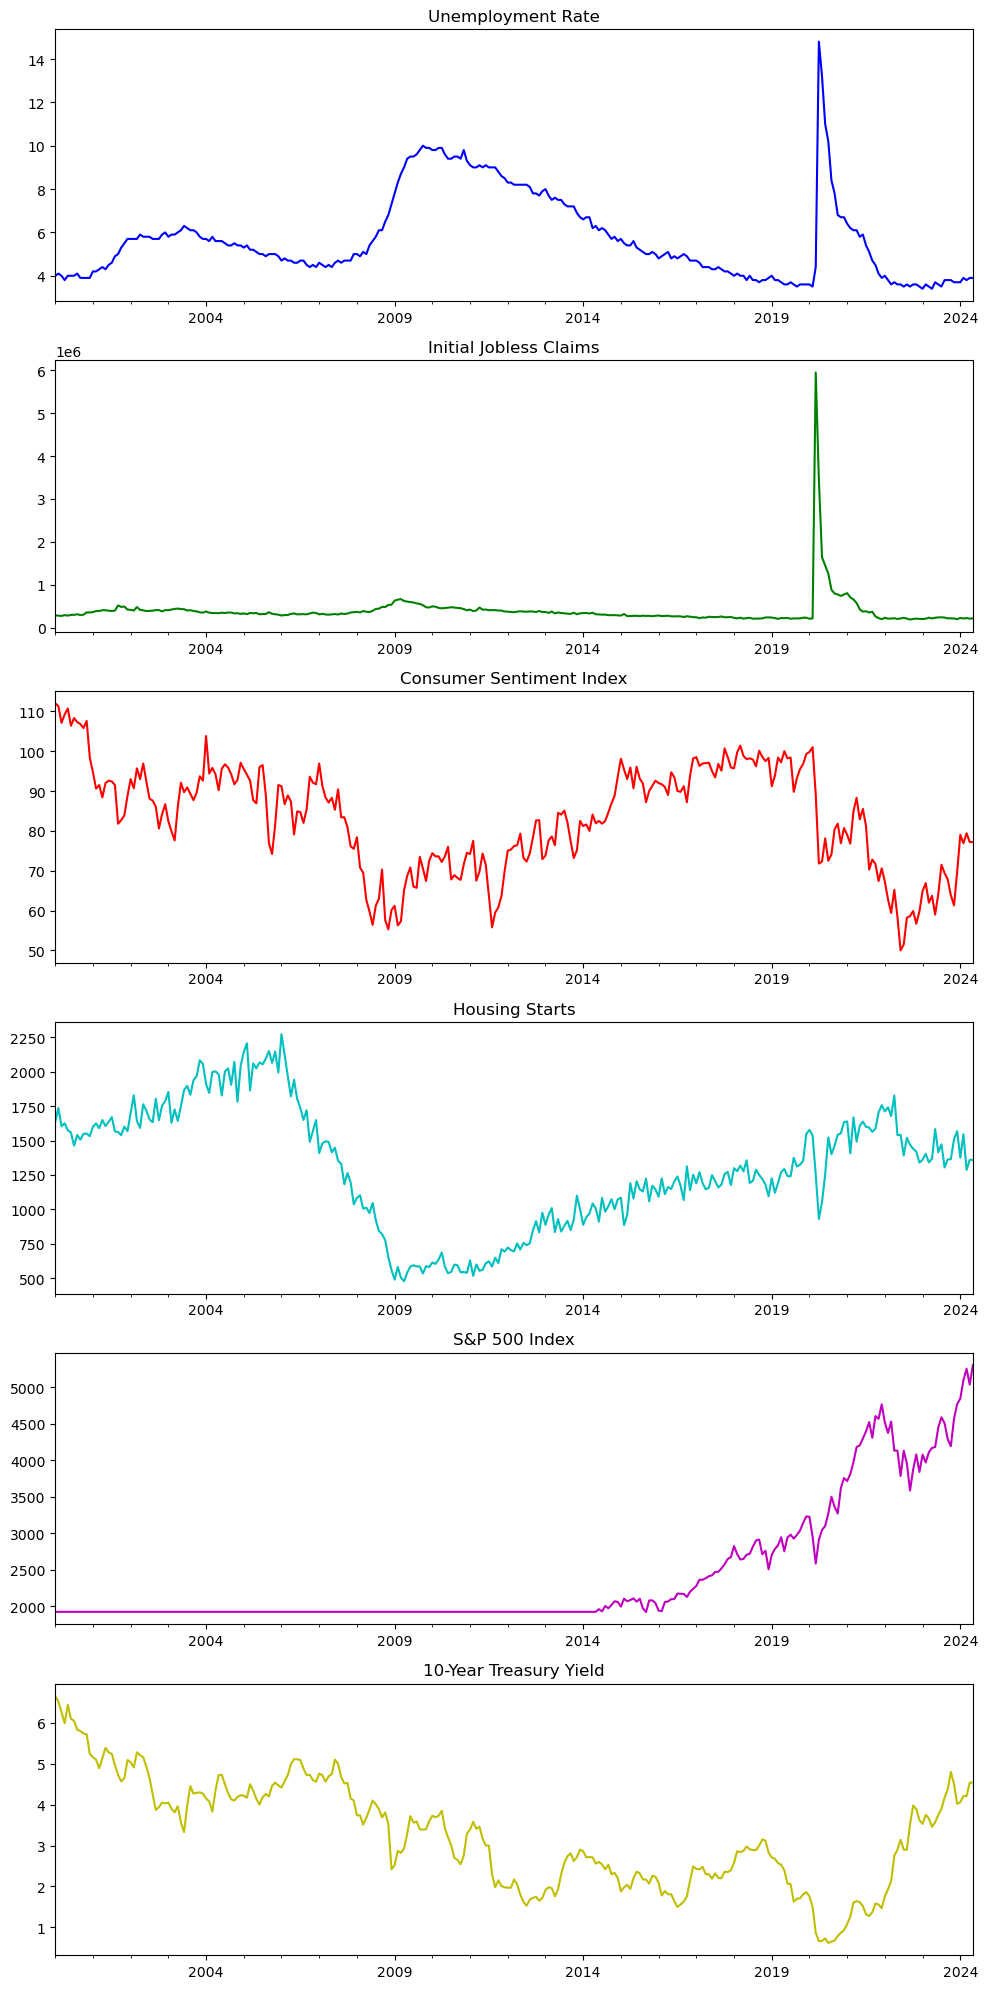

In [3]:
import matplotlib.pyplot as plt

# Set figure size for Microsoft document
fig, axs = plt.subplots(6, 1, figsize=(10, 20))

# Plot each economic indicator
combined_data['Unemployment Rate'].plot(ax=axs[0], title='Unemployment Rate', color='b')
combined_data['Initial Jobless Claims'].plot(ax=axs[1], title='Initial Jobless Claims', color='g')
combined_data['Consumer Sentiment Index'].plot(ax=axs[2], title='Consumer Sentiment Index', color='r')
combined_data['Housing Starts'].plot(ax=axs[3], title='Housing Starts', color='c')
combined_data['S&P 500 Index'].plot(ax=axs[4], title='S&P 500 Index', color='m')
combined_data['10-Year Treasury Yield'].plot(ax=axs[5], title='10-Year Treasury Yield', color='y')

# Adjust layout
plt.tight_layout()
plt.savefig('time_series_plots.png')
plt.show()


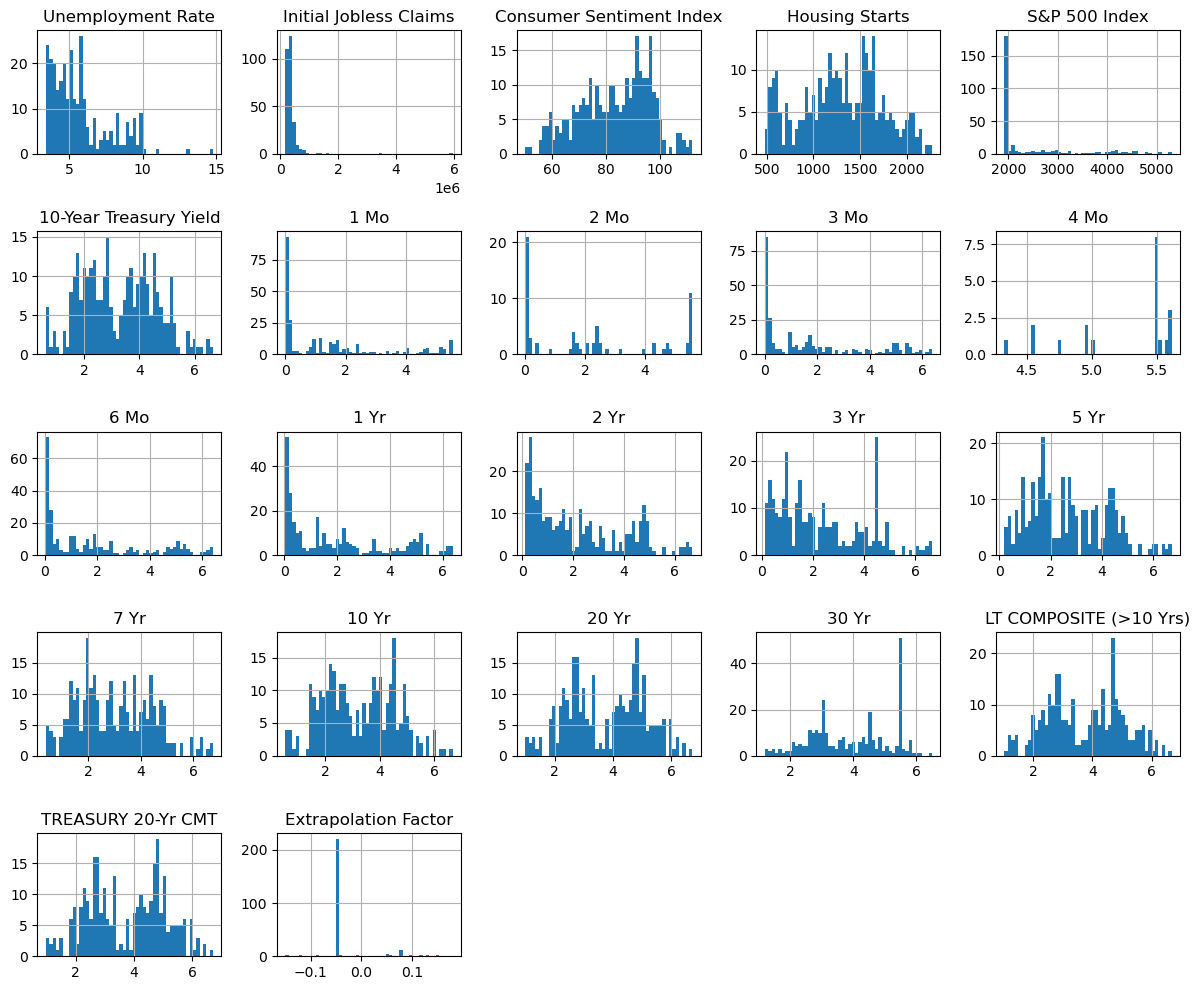

In [4]:
import matplotlib.pyplot as plt

# Set figure size for Microsoft document
combined_data.hist(bins=50, figsize=(12, 10))

# Adjust layout
plt.tight_layout()
plt.savefig('histograms.png')
plt.show()


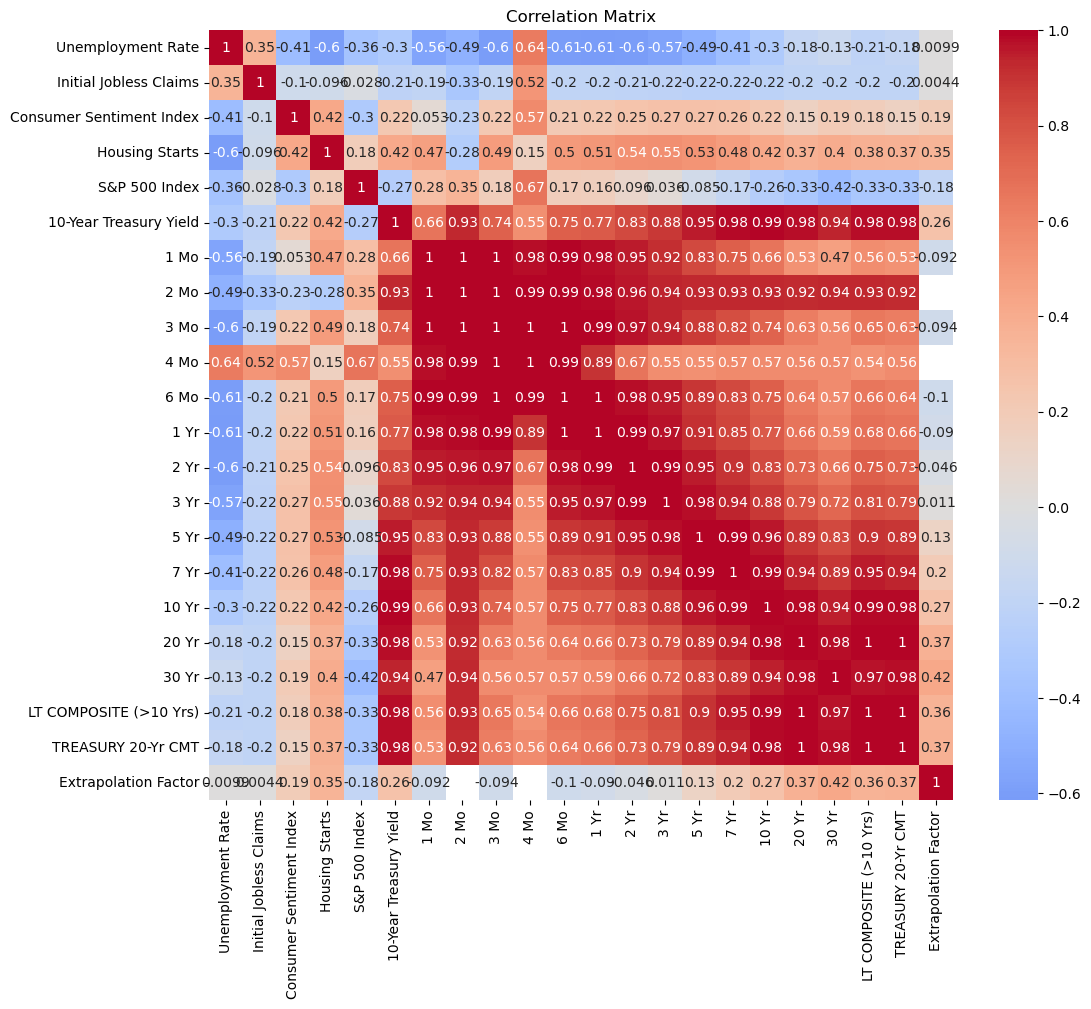

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = combined_data.corr()

# Set figure size for Microsoft document
plt.figure(figsize=(12, 10))

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Set title and save figure
plt.title('Correlation Matrix')
plt.savefig('correlation_heatmap.png')
plt.show()


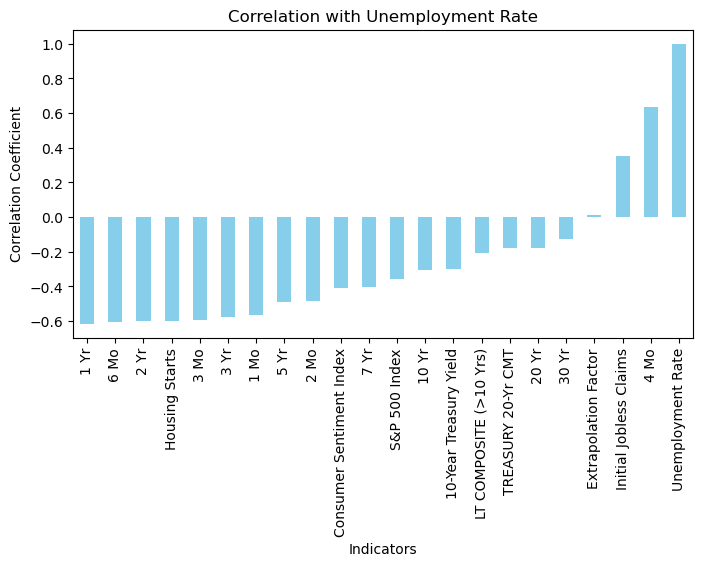

In [6]:
import matplotlib.pyplot as plt

# Calculate correlations with the Unemployment Rate
correlation_with_unemployment = correlation_matrix['Unemployment Rate'].sort_values()

# Set figure size for Microsoft document
plt.figure(figsize=(8, 4))

# Plot bar chart
correlation_with_unemployment.plot(kind='bar', color='skyblue')

# Set title and labels
plt.title('Correlation with Unemployment Rate')
plt.xlabel('Indicators')
plt.ylabel('Correlation Coefficient')

# Save figure
plt.savefig('correlation_with_unemployment.png')
plt.show()


## Feature Engineering

In [7]:
# Create lagged variables
for lag in range(1, 13):
    combined_data[f'Unemployment Rate Lag {lag}'] = combined_data['Unemployment Rate'].shift(lag)
    combined_data[f'Initial Jobless Claims Lag {lag}'] = combined_data['Initial Jobless Claims'].shift(lag)
    combined_data[f'Consumer Sentiment Index Lag {lag}'] = combined_data['Consumer Sentiment Index'].shift(lag)
    combined_data[f'Housing Starts Lag {lag}'] = combined_data['Housing Starts'].shift(lag)
    combined_data[f'S&P 500 Index Lag {lag}'] = combined_data['S&P 500 Index'].shift(lag)
    combined_data[f'10-Year Treasury Yield Lag {lag}'] = combined_data['10-Year Treasury Yield'].shift(lag)

# Create moving averages
combined_data['Unemployment Rate MA 3'] = combined_data['Unemployment Rate'].rolling(window=3).mean()
combined_data['Unemployment Rate MA 6'] = combined_data['Unemployment Rate'].rolling(window=6).mean()
combined_data['Unemployment Rate MA 12'] = combined_data['Unemployment Rate'].rolling(window=12).mean()

combined_data.dropna(inplace=True)


## Model Training and Evaluation

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

# Prepare data for modeling
X = combined_data.drop(columns=['Unemployment Rate'])
y = combined_data['Unemployment Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ARIMA model
arima_model = ARIMA(y_train, order=(5, 1, 0))
arima_model_fit = arima_model.fit()
arima_forecast = arima_model_fit.forecast(steps=len(y_test))
arima_rmse = mean_squared_error(y_test, arima_forecast, squared=False)
arima_mae = mean_absolute_error(y_test, arima_forecast)
print(f'ARIMA RMSE: {arima_rmse}, MAE: {arima_mae}')

# Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_mae = mean_absolute_error(y_test, rf_predictions)
print(f'Random Forest RMSE: {rf_rmse}, MAE: {rf_mae}')

# Gradient Boosting model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_rmse = mean_squared_error(y_test, gb_predictions, squared=False)
gb_mae = mean_absolute_error(y_test, gb_predictions)
print(f'Gradient Boosting RMSE: {gb_rmse}, MAE: {gb_mae}')


C:\Users\salin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\salin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\salin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\salin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\salin\anaconda3\lib\site-

ARIMA RMSE: 0.10776656125850885, MAE: 0.0770757442511163
Random Forest RMSE: 0.07235848257115321, MAE: 0.06774999999999909
Gradient Boosting RMSE: 0.11667202085334205, MAE: 0.11482187250948483


## Deployment and Monitoring

In [9]:
# Implementing a simple prediction function
def predict_unemployment_rate(model, new_data):
    prediction = model.predict(new_data)
    return prediction

# Continuous monitoring and updating models
# This part will be more extensive in a real-world scenario involving setting up pipelines and automated updates
import joblib

# Save models
joblib.dump(arima_model_fit, 'arima_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(gb_model, 'gradient_boosting_model.pkl')

# Load models
arima_model_loaded = joblib.load('arima_model.pkl')
rf_model_loaded = joblib.load('random_forest_model.pkl')
gb_model_loaded = joblib.load('gradient_boosting_model.pkl')

# Example usage with new data
new_data = X_test.iloc[:1]  # Replace with new data as needed
arima_prediction = arima_model_loaded.forecast(steps=1)
rf_prediction = predict_unemployment_rate(rf_model_loaded, new_data)
gb_prediction = predict_unemployment_rate(gb_model_loaded, new_data)

print(f'ARIMA Prediction: {arima_prediction}')
print(f'Random Forest Prediction: {rf_prediction}')
print(f'Gradient Boosting Prediction: {gb_prediction}')


ARIMA Prediction: 16    3.720503
dtype: float64
Random Forest Prediction: [3.537]
Gradient Boosting Prediction: [3.50408567]


C:\Users\salin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


## Code to Forecast Future Economic Indicators and Predict Unemployment Rate

In [10]:
import pandas as pd
import numpy as np
from datetime import timedelta

# Generate future dates for the next five years
future_dates = pd.date_range(start='2024-06-01', end='2029-06-01', freq='M')

# Create a DataFrame to hold future values of the indicators
future_data = pd.DataFrame(index=future_dates, columns=combined_data.columns)

# Forecast future values for the economic indicators
# Here, we will use a simple method of extending the last known value forward
# In practice, more sophisticated methods like ARIMA could be used for each indicator

for column in combined_data.columns:
    last_value = combined_data[column].iloc[-1]
    future_data[column] = last_value

# Apply some variation to simulate realistic changes over time (this is a simplified approach)
np.random.seed(42)  # For reproducibility
for column in future_data.columns:
    future_data[column] = future_data[column] * (1 + 0.01 * np.random.randn(len(future_data)))

# Ensure the future data aligns with the features used in the model
feature_columns = X_train.columns
future_data = future_data[feature_columns]

# Use the trained Random Forest model to make predictions
future_predictions = rf_model.predict(future_data)

# Combine the future dates with the predicted unemployment rates
future_forecast = pd.DataFrame({'Date': future_dates, 'Predicted Unemployment Rate': future_predictions})

# Set the date as the index
future_forecast.set_index('Date', inplace=True)

# Print the predictions
print(future_forecast)


            Predicted Unemployment Rate
Date                                   
2024-06-30                        3.847
2024-07-31                        3.839
2024-08-31                        3.845
2024-09-30                        3.849
2024-10-31                        3.831
2024-11-30                        3.846
2024-12-31                        3.840
2025-01-31                        3.850
2025-02-28                        3.852
2025-03-31                        3.851
2025-04-30                        3.846
2025-05-31                        3.852
2025-06-30                        3.851
2025-07-31                        3.843
2025-08-31                        3.851
2025-09-30                        3.853
2025-10-31                        3.853
2025-11-30                        3.842
2025-12-31                        3.853
2026-01-31                        3.844
2026-02-28                        3.854
2026-03-31                        3.845
2026-04-30                        3.838


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

# Assuming combined_data is already prepared and preprocessed as in the provided script

# Filter data for the 2008 financial crisis (e.g., 2007-2009)
crisis_2008_data = combined_data['2007':'2009']

# Filter data for the COVID-19 pandemic (e.g., 2020-2021)
covid_data = combined_data['2020':'2021']

# Train the model on data before the crisis periods
train_data = combined_data[:'2007']

X_train = train_data.drop(columns=['Unemployment Rate'])
y_train = train_data['Unemployment Rate']

# Create test data for the crisis periods
X_test_2008 = crisis_2008_data.drop(columns=['Unemployment Rate'])
y_test_2008 = crisis_2008_data['Unemployment Rate']

X_test_covid = covid_data.drop(columns=['Unemployment Rate'])
y_test_covid = covid_data['Unemployment Rate']

# Train the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Predictions for the 2008 financial crisis
predictions_2008 = rf_model.predict(X_test_2008)
rmse_2008 = mean_squared_error(y_test_2008, predictions_2008, squared=False)
mae_2008 = mean_absolute_error(y_test_2008, predictions_2008)

# Predictions for the COVID-19 pandemic
predictions_covid = rf_model.predict(X_test_covid)
rmse_covid = mean_squared_error(y_test_covid, predictions_covid, squared=False)
mae_covid = mean_absolute_error(y_test_covid, predictions_covid)

# Plotting the results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(y_test_2008.index, y_test_2008, label='Actual 2008')
plt.plot(y_test_2008.index, predictions_2008, label='Predicted 2008')
plt.title('2008 Financial Crisis')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(y_test_covid.index, y_test_covid, label='Actual COVID-19')
plt.plot(y_test_covid.index, predictions_covid, label='Predicted COVID-19')
plt.title('COVID-19 Unemployment Spike')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend()

plt.tight_layout()
plt.show()

print(f'2008 Financial Crisis - RMSE: {rmse_2008}, MAE: {mae_2008}')
print(f'COVID-19 Pandemic - RMSE: {rmse_covid}, MAE: {mae_covid}')


ValueError: Found array with 0 sample(s) (shape=(0, 96)) while a minimum of 1 is required by RandomForestRegressor.